In [52]:
import sys
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline')
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project')
import lpfet
import numpy as np
import matplotlib.pyplot as plt
import essentials
import seaborn as sns
import matplotlib.colors as mcolors

import importlib
importlib.reload(lpfet)

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 6 site **chain** with constant potential difference between neighbouring atoms  
```
a-b-c-d-e-f
```
All depends on variable i - element of array x that sets potentials:


| site | external potential | 
| --- | --- |
| a | -2.5i | 
| b | -1.5i |
| c | -0.5i |
| d | +0.5i |
| e | +1.5i |
| f | +2.5i |

In [13]:
lpfet.COMPENSATION_1_RATIO = 0.75
x = np.arange(0.05, 2.1, 0.2)
name = 'chain1'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(i, i/max(x))
    pmv = i
    
    nodes_dict = dict()
    edges_dict = dict()
    eq_list = []
    for j in range(6):
        nodes_dict[j] = {'v': -2.5 + j * i, 'U': 1}
        if j != 5:
            edges_dict[(j, j+1)] = 1
        eq_list.append([j])
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    mol1.self_consistent_loop(num_iter=20, tolerance=1E-6, oscillation_compensation=1)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
Loop 0, Loop 1, -0.57->-0.28->-0.76!=-0.92, -0.36->-0.63->-0.33!=-0.23, Loop 2, -0.28->-0.76->-0.16!=0.04, -0.63->-0.33->-0.68!=-0.80, Loop 3, -0.76->-0.16->-0.90!=-1.15, -0.33->-0.68->-0.26!=-0.12, -0.38->-0.61->-0.35!=-0.26, Loop 4, -0.16->-0.90->0.02!=0.32, -0.68->-0.26->-0.80!=-0.98, -0.45->-0.68->-0.29!=-0.17, -0.61->-0.35->-0.70!=-0.82, Loop 5, -0.90->0.02->-1.05!=-1.40, -0.26->-0.80->0.04!=0.32, -0.68->-0.29->-0.75!=-0.90, -0.35->-0.70->-0.24!=-0.09, -0.43->-0.51->-0.33!=-0.27, Loop 6, 0.02->-1.05->0.32!=0.78, -0.80->0.04->-1.19!=-1.59, -0.29->-0.75->-0.15!=0.05, -0.70->-0.24->-0.78!=-0.96, -0.51->-0.33->-0.69!=-0.81, Loop 7, -1.05->0.32->-1.44!=-2.02, 0.04->-1.19->0.32!=0.82, -0.75->-0.15->-1.07!=-1.37, -0.24->-0.78->-0.21!=-0.03, -0.33->-0.69->-0.26!=-0.12, Loop 8, 0.32->-1.44->0.89!=1.66, -1.19->0.32->-1.45!=-2.04, -0.15->-1.07->0.18!=0.60, -0.78->-0.21->-0.9

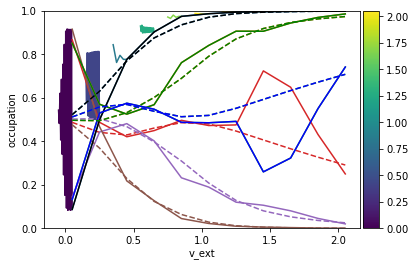

In [14]:
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))

for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])
for i in range(6):
    plt.plot(x, y_simple[:, i], c=mpl.cm.get_cmap('tab10')(i), label=str(i))
    plt.plot(x, y_ref[:, i], c=mpl.cm.get_cmap('tab10')(i), label=str(i)+'-ref', linestyle='--')
plt.plot(x, y_simple[:, 0], c='k', label='0, 3')
plt.plot(x, y_simple[:, 1], c='g', label='1, 4')
plt.plot(x, y_simple[:, 2], c='b', label='2, 5')
plt.plot(x, y_ref[:, 0], c='k', linestyle='--', label='0, 3, ref')
plt.plot(x, y_ref[:, 1], c='g', linestyle='--', label='1, 4, ref')
plt.plot(x, y_ref[:, 2], c='b', linestyle='--', label='2, 5, ref')
plt.xlabel("v_ext")
# plt.xlim(-.6, 2.1)
plt.ylabel("occupation")
# plt.legend()
plt.ylim(0,1)
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)
plt.show()

It looks like it is very unstable. I will increase compensation ratio:

In [55]:
lpfet.COMPENSATION_1_RATIO = 0.5
x = np.arange(0.05, 2.1, 0.2)
name = 'chain1'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
correction_dict_list = []
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(f'{i:.1f}, {i/max(x)*100:.1f}%: ', end=' ')
    pmv = i
    
    nodes_dict = dict()
    edges_dict = dict()
    eq_list = []
    for j in range(6):
        nodes_dict[j] = {'v': (j - 2.5) * i, 'U': 1}
        if j != 5:
            edges_dict[(j, j+1)] = 1
        eq_list.append([j])
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    mol1.self_consistent_loop(num_iter=20, tolerance=1E-6, oscillation_compensation=1)
    correction_dict_list.append(mol1.oscillation_correction_dict)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.1, 2.4%:  Loop 0, Loop 1, -0.57->-0.28->-0.60!=-0.92, -0.36->-0.63->-0.43!=-0.23, Loop 2, -0.28->-0.60->-0.45!=-0.29, Loop 3, Loop 4, Loop 5, Loop 6, FCI densities (per spin): [0.52318178 0.49729045 0.51242487 0.48757513 0.50270955 0.47681822]
0.2, 12.2%:  Loop 0, Loop 1, -0.70->-0.16->-0.66!=-1.15, -0.34->-0.71->-0.45!=-0.18, -0.28->-0.60->-0.45!=-0.29, -0.25->-0.58->-0.36!=-0.15, Loop 2, -0.40->-0.66->-0.49!=-0.32, -0.58->-0.36->-0.49!=-0.62, Loop 3, Loop 4, Loop 5, Loop 6, FCI densities (per spin): [0.63054945 0.49527343 0.55848226 0.44151774 0.50472657 0.36945055]
0.5, 22.0%:  Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, FCI densities (per spin): [0.77045195 0.53221476 0.57015191 0.42984809 0.46778524 0.22954805]
0.7, 31.7%:  Loop 0, Loop 1, -0.63->-0.34->-0.60!=-0.86, -0.41->-0.64->-0.45!=-0.25, -0.21->-0.47->-0.35!=-0.23, Loop 2, Loop 3, Loop 4, FCI densities (per spin): [0.87594156 0.60201

2 1 (-0.35883642800826265, -0.6327346465763096, -0.4310164745094155, -0.4310164745094155)
2 1 (-0.34025088837896367, -0.7116201433409484, -0.4467786918431471, -0.4467786918431471)
2 1 (-0.632760648869986, -0.34352668025480904, -0.6026754689005069, -0.6026754689005069)


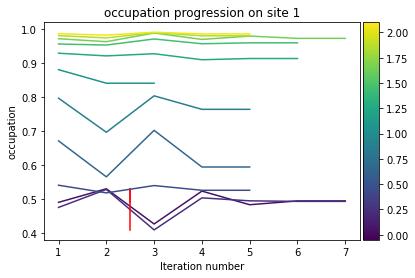

In [61]:
# Same site in the same picture

norm = mpl.colors.Normalize(vmin=-0.05,  vmax=2.1)
plot_index = 1
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    plt.plot(np.arange(len(regime))+1, regime[:,plot_index], color=mpl.cm.viridis(norm(mu_ext)))
    
    key_list = list(correction_dict_list[x_i].keys())
    plot_keys = [i for i in key_list if i[1] == plot_index]
    for iter_key, site_key in plot_keys:
        value = correction_dict_list[x_i][(iter_key, site_key)]
        print(iter_key, site_key, value)
        plt.plot([iter_key+0.5,iter_key+0.5], [regime[x_i,plot_index], regime[x_i+1,plot_index]], c='r')


plt.xlabel("Iteration number")
plt.ylabel("occupation")
plt.title(f'occupation progression on site {plot_index}')
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)
plt.savefig(f'results/Chain1/occupation(iter)_oscillations_site-{plot_index}.png', dpi=150)

3 0 0
3 0 1
4 0 0
3 1 0
3 1 1
3 1 3
3 1 5
4 1 4
4 1 5
3 3 1
3 3 2
3 3 4
3 4 4
3 6 2
3 6 3
3 7 2
3 7 3
3 8 2
3 8 3
5 8 2
5 8 3
3 9 2
3 9 3


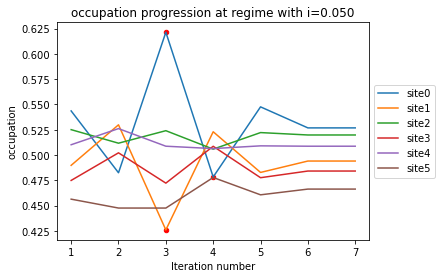

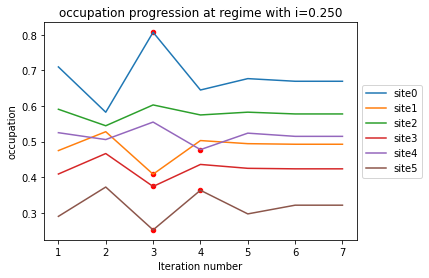

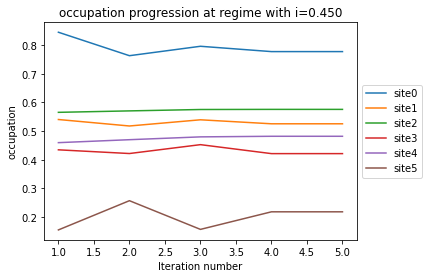

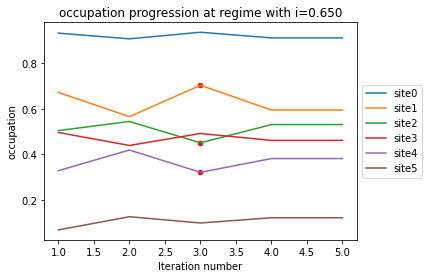

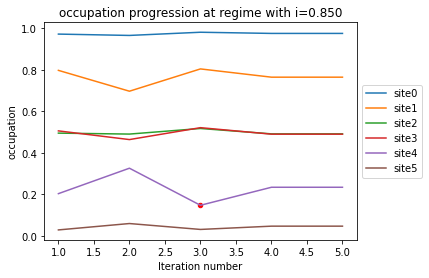

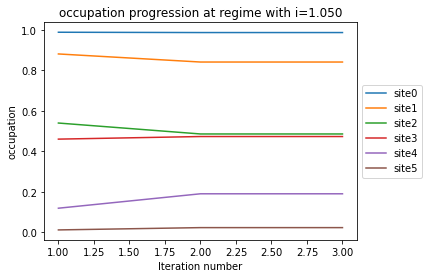

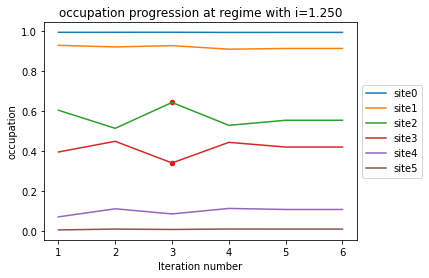

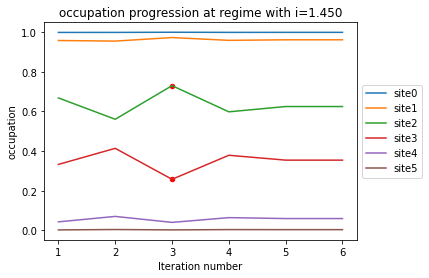

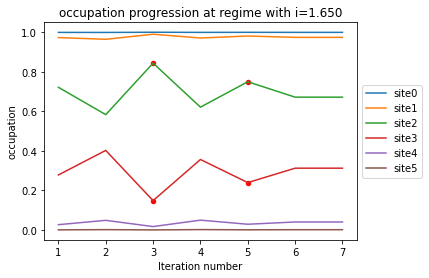

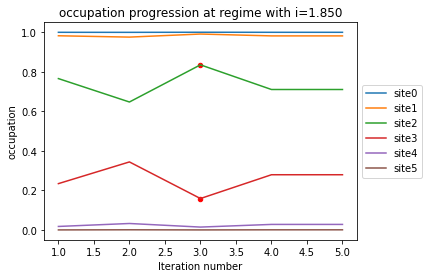

In [75]:
# one regime per picture
for x_i in range(10):
    fig, ax = plt.subplots(1,1,figsize=(7,4))
    norm = mpl.colors.Normalize(vmin=-0.05,  vmax=2.1)
    regime = y[x_i]
    mu_ext = x[x_i]

    key_list = list()

    for site_id in range(6):
        length = len(regime)
        plt.plot(np.arange(len(regime))+1, regime[:,site_id], color=mpl.cm.tab10(site_id), label=f'site{site_id}')

    for key1 in  correction_dict_list[x_i].keys():
        iter_key, site_key = key1
        
        value = correction_dict_list[x_i][key1]
        plt.scatter([iter_key+1], [regime[iter_key,site_key]], c='r', s=20)


    plt.xlabel("Iteration number")
    plt.ylabel("occupation")
    plt.title(f'occupation progression at regime with i={mu_ext:.3f}')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(f'results/Chain1/occupation(iter)_oscillations_regime-i-{mu_ext:.3f}.png', dpi=150)


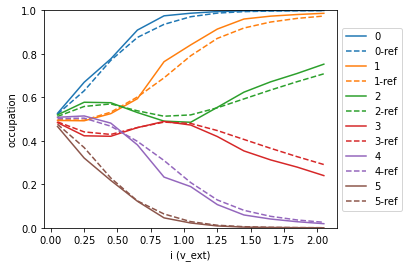

In [76]:
import matplotlib as mpl
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

fig, ax = plt.subplots(1,1, figsize=(7,4))

# for x_i, regime in enumerate(y):
#     mu_ext = x[x_i]
#     length = len(regime)
#     x_data = np.linspace(-0.1, 0, length) + mu_ext
#     plt.plot(x_data, regime[:,0], color=colors[x_i])
for i in range(6):
    plt.plot(x, y_simple[:, i], c=mpl.cm.get_cmap('tab10')(i), label=str(i))
    plt.plot(x, y_ref[:, i], c=mpl.cm.get_cmap('tab10')(i), label=str(i)+'-ref', linestyle='--')
plt.xlabel("i (v_ext)")
# plt.xlim(-.6, 2.1)
plt.ylabel("occupation")
plt.ylim(0,1)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('results/Chain1/occupation(v_ext)_compenstion-ratio-0.5.png', dpi=150)

## Many random starting configurations
Random values from -0.05 to 0.05

In [118]:
experiment_number = 60

In [119]:
lpfet.COMPENSATION_1_RATIO = 0.5
i = 0.5
name = 'chain2'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
inp_values = []
nodes_dict = dict()
edges_dict = dict()
eq_list = []
for j in range(6):
    nodes_dict[j] = {'v': (j - 2.5) * i, 'U': 1}
    if j != 5:
        edges_dict[(j, j+1)] = 1
    eq_list.append([j])

for temp_var in range(experiment_number):
    if not first:
        mol1.clear_object(name)
    first = False
    print('\n',f'{temp_var/experiment_number*100:.1f}%', end=': ')
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    initial_mu_hxc = np.random.random(6) * 0.1 - 0.05
    mol1.mu_hxc = initial_mu_hxc
    inp_values.append(initial_mu_hxc)
    mol1.self_consistent_loop(num_iter=30, tolerance=1e-6, oscillation_compensation=1)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
y_ref = y_ab.diagonal()

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====

 0.0%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 1.7%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 3.3%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 5.0%: Loop 0, Loop 1, Loop 2, -0.32->-0.55->-0.40!=-0.24, Loop 3, Loop 4, Loop 5, 
 6.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 8.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 10.0%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 11.7%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 13.3%: Loop 0, Loop 1, Loop 2, -0.28->-0.54->-0.42!=-0.31, Loop 3, Loop 4, Loop 5, 
 15.0%: Loop 0, Loop 1, Loop 2, -0.26->-0.63->-0.41!=-0.19, Loop 3, Loop 4, Loop 5, 
 16.7%: Loop 0, Loop 1, -0.61->-0.36->-0.56!=-0.77, -0.41->-0.66->-0.49!=-0.31, Loop 2, Loop 3, Loop 4, Loop 5, 
 18.3%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 20.0%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 21.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 23.3%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, 
 25.0%: Loop 0, Loop

index 0: my result: 0.833, reference: 0.802; difference: 0.031, stdev: 0.009
index 1: my result: 0.540, reference: 0.548; difference: -0.008, stdev: 0.010
index 2: my result: 0.565, reference: 0.564; difference: 0.001, stdev: 0.009
index 3: my result: 0.443, reference: 0.436; difference: 0.008, stdev: 0.009
index 4: my result: 0.455, reference: 0.452; difference: 0.003, stdev: 0.007
index 5: my result: 0.164, reference: 0.198; difference: -0.034, stdev: 0.014


Text(0.5, 1.0, 'Density fluctuations with starting random v^Hxc between -0.05 and 0.05')

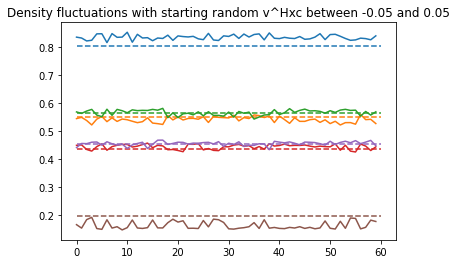

In [120]:

colors = mpl.cm.get_cmap('tab10')(5)

for i in range(6):
    plt.plot(y_simple[:,i], c=mpl.cm.get_cmap('tab10')(i))
    plt.hlines(y_ref[i], 0, experiment_number, color=mpl.cm.get_cmap('tab10')(i), linestyle='dashed')
    print(f'index {i}: my result: {np.average(y_simple[:,i]):.3f}, reference: {y_ref[i]:.3f}; difference: {np.average(y_simple[:,i])-y_ref[i]:.3f}, stdev: {np.std(y_simple[:,i]-y_ref[i]):.3f}')
plt.title('Density fluctuations with starting random v^Hxc between -0.05 and 0.05')

index 0: my result: 0.833, reference: 0.802; difference: 0.031, stdev: 0.009
index 1: my result: 0.540, reference: 0.548; difference: -0.008, stdev: 0.010
index 2: my result: 0.565, reference: 0.564; difference: 0.001, stdev: 0.009
index 3: my result: 0.443, reference: 0.436; difference: 0.008, stdev: 0.009
index 4: my result: 0.455, reference: 0.452; difference: 0.003, stdev: 0.007
index 5: my result: 0.164, reference: 0.198; difference: -0.034, stdev: 0.014


[(0.833279053730405,
  0.8024589129324315,
  0.03082014079797346,
  0.008797238083185947),
 (0.5396969379294876,
  0.5479496427957445,
  -0.008252704866256955,
  0.009802394649207766),
 (0.5652523491540742,
  0.5642716960686258,
  0.0009806530854483686,
  0.009420777833378623),
 (0.44327451836363935,
  0.4357283039313763,
  0.007546214432263054,
  0.008532324056456892),
 (0.4549360457820628,
  0.45205035720425757,
  0.0028856885778052455,
  0.007109482374282163),
 (0.1635610950403307,
  0.19754108706757023,
  -0.03397999202723953,
  0.013742324734577848)]

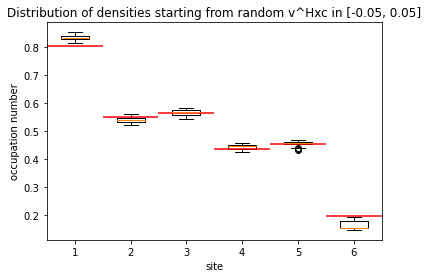

In [121]:
distribution_array_005 = []
plt.boxplot(y_simple)
for i in range(6):
    plt.hlines(y_ref[i], i+0.5, i+1.5, color='r')
    print(f'index {i}: my result: {np.average(y_simple[:,i]):.3f}, reference: {y_ref[i]:.3f}; difference: {np.average(y_simple[:,i])-y_ref[i]:.3f}, stdev: {np.std(y_simple[:,i]-y_ref[i]):.3f}')
    distribution_array_005.append((np.average(y_simple[:,i]), y_ref[i], np.average(y_simple[:,i])-y_ref[i], np.std(y_simple[:,i]-y_ref[i])))
plt.xlabel('site')
plt.ylabel('occupation number')
plt.title('Distribution of densities starting from random v^Hxc in [-0.05, 0.05]')
plt.savefig('results/Chain1/Distribution-densities_delta-0.05.png', dpi=150)
distribution_array_005

In [122]:
from sklearn.preprocessing import StandardScaler
pca_y = StandardScaler().fit_transform(y_simple) # normalizing the features

from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
principalComponents_pca_y = pca_model.fit_transform(pca_y)

[0.44222498 0.30140689]


Text(0.5, 1.0, 'PCA with starting configurations [-0.05, 0.05]')

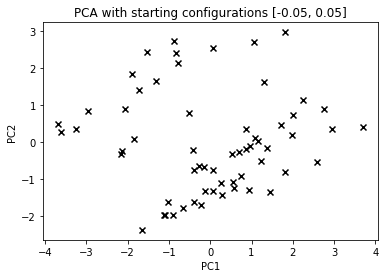

In [125]:
plt.scatter(principalComponents_pca_y[:,0], principalComponents_pca_y[:, 1], c='k', marker='x')
print(pca_model.explained_variance_ratio_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with starting configurations [-0.05, 0.05]')

In [126]:
lpfet.COMPENSATION_1_RATIO = 0.5
i = 0.5
name = 'chain2'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
inp_values = []
nodes_dict = dict()
edges_dict = dict()
eq_list = []
for j in range(6):
    nodes_dict[j] = {'v': (j - 2.5) * i, 'U': 1}
    if j != 5:
        edges_dict[(j, j+1)] = 1
    eq_list.append([j])

for temp_var in range(experiment_number):
    if not first:
        mol1.clear_object(name)
    first = False
    print('\n',f'{temp_var/experiment_number*100:.1f}%', end=': ')
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    initial_mu_hxc = np.random.random(6) * 0.01 - 0.005
    mol1.mu_hxc = initial_mu_hxc
    inp_values.append(initial_mu_hxc)
    mol1.self_consistent_loop(num_iter=30, tolerance=1e-6, oscillation_compensation=1)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
y_ref = y_ab.diagonal()

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====

 0.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 1.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 3.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 5.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 6.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 8.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 10.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 11.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 13.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 15.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 16.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 18.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 20.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 21.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 23.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 25.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 26.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 28.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 30.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 31.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 33.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 35.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 36.7%: L

index 0: my result: 0.828, reference: 0.802; difference: 0.025
index 1: my result: 0.538, reference: 0.548; difference: -0.010
index 2: my result: 0.570, reference: 0.564; difference: 0.006
index 3: my result: 0.446, reference: 0.436; difference: 0.010
index 4: my result: 0.465, reference: 0.452; difference: 0.012
index 5: my result: 0.153, reference: 0.198; difference: -0.044


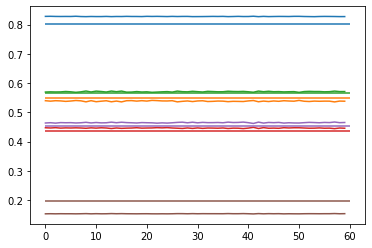

In [127]:
from matplotlib import cm
colors = cm.get_cmap('tab10')(5)

for i in range(6):
    plt.plot(y_simple[:,i], c=cm.get_cmap('tab10')(i))
    plt.hlines(y_ref[i], 0, experiment_number, color=cm.get_cmap('tab10')(i))
    print(f'index {i}: my result: {np.average(y_simple[:,i]):.3f}, reference: {y_ref[i]:.3f}; difference: {np.average(y_simple[:,i])-y_ref[i]:.3f}')

index 0: my result: 0.828, reference: 0.802; difference: 0.025, stdev: 0.000
index 1: my result: 0.538, reference: 0.548; difference: -0.010, stdev: 0.001
index 2: my result: 0.570, reference: 0.564; difference: 0.006, stdev: 0.001
index 3: my result: 0.446, reference: 0.436; difference: 0.010, stdev: 0.001
index 4: my result: 0.465, reference: 0.452; difference: 0.012, stdev: 0.001
index 5: my result: 0.153, reference: 0.198; difference: -0.044, stdev: 0.000


[(0.8276546488596443,
  0.8024589129324315,
  0.025195735927212803,
  0.00033048536114638265),
 (0.5381800649171872,
  0.5479496427957445,
  -0.009769577878557367,
  0.0013379295228897663),
 (0.5704699774036754,
  0.5642716960686258,
  0.006198281335049627,
  0.0011501067135211043),
 (0.4460830120329328,
  0.4357283039313763,
  0.010354708101556531,
  0.0008878072643542853),
 (0.4645463623761817,
  0.45205035720425757,
  0.012496005171924118,
  0.0010256944882945079),
 (0.15306593441037855,
  0.19754108706757023,
  -0.04447515265719168,
  0.0002604042993252579)]

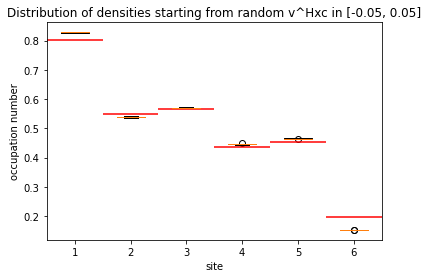

In [128]:
distribution_array_0005 = []
plt.boxplot(y_simple)
for i in range(6):
    plt.hlines(y_ref[i], i+0.5, i+1.5, color='r')
    print(f'index {i}: my result: {np.average(y_simple[:,i]):.3f}, reference: {y_ref[i]:.3f}; difference: {np.average(y_simple[:,i])-y_ref[i]:.3f}, stdev: {np.std(y_simple[:,i]-y_ref[i]):.3f}')
    distribution_array_0005.append((np.average(y_simple[:,i]), y_ref[i], np.average(y_simple[:,i])-y_ref[i], np.std(y_simple[:,i]-y_ref[i])))
plt.xlabel('site')
plt.ylabel('occupation number')
plt.title('Distribution of densities starting from random v^Hxc in [-0.05, 0.05]')
plt.savefig('results/Chain1/Distribution-densities_delta-0.005.png', dpi=150)
distribution_array_0005

In [129]:
distribution_array_0005 = np.array(distribution_array_0005)
distribution_array_005 = np.array(distribution_array_005)

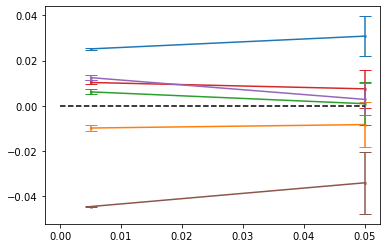

In [130]:
for i in range(6):
    plt.plot([0.005, 0.05], [distribution_array_0005[i, 2], distribution_array_005[i, 2]], c=mpl.cm.get_cmap('tab10')(i))
    plt.errorbar([0.005, 0.05], [distribution_array_0005[i, 2], distribution_array_005[i, 2]], [distribution_array_0005[i, 3], distribution_array_005[i, 3]], c=mpl.cm.get_cmap('tab10')(i), fmt='x', markersize=2, capsize=6)
plt.hlines(0, 0, 0.05, color='k', linestyle='dashed')